In [1]:
from pandas import DataFrame
path = 'data/Random_compounds_Sabina.csv'
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = DataFrame.from_csv(path)
dawid_bin = df.iloc[0:30,:].as_matrix()  # 0-1
dawid_scale = df.iloc[31:61,:].as_matrix()  # scale
# _ = df.iloc[62:92,:].as_matrix()  # same nany
sabina_bin = df.iloc[93:123,:].as_matrix()  # 0-1
sabina_scale = df.iloc[125:-1,:].as_matrix()  # scale

dane = [dawid_bin, dawid_scale, sabina_bin, sabina_scale]

for d in dane:
    for r in xrange(d.shape[0]):
        for c in xrange(d.shape[1]):
            val = d[r,c]
            if val=='0':
                val = -1
            elif val=='X':
                val = 0
            else:
                val = int(val)
            d[r, c] = val
            
print np.sum(dawid_bin-sabina_bin)/2
print np.sum(dawid_scale-sabina_scale)

# czy symetryczne
for d in dane:
    for r in xrange(d.shape[0]):
        for c in xrange(d.shape[1]):
            if r < c:
                if d[r, c] != d[c, r]:
                    print r, c
# tak, chociaż symetryczne

print 'koniec'

20
428
koniec


In [3]:
def value_count(data):
    vals, counts = np.unique(data, return_counts=True)
    
    index_of_zero = np.where(vals==0)[0][0]
    indices = list(xrange(len(vals)))
    indices = indices[:index_of_zero] + indices[index_of_zero+1:]
    
    vals=vals[indices]
    counts=counts[indices]
    
    return vals, counts
    
print value_count(sabina_bin)
print value_count(dawid_bin)
print '\n'
print value_count(sabina_scale)
print value_count(dawid_scale)

# TODO: z tego obrazek!

(array([-1, 1], dtype=object), array([812,  58]))
(array([-1, 1], dtype=object), array([792,  78]))


(array([1, 2, 3, 4, 5], dtype=object), array([780,  36,  22,  20,  12]))
(array([1, 2, 3, 4, 5], dtype=object), array([442, 328,  42,  28,  30]))


[[  25.    4.]
 [  14.  392.]]
1.60943791243 5.97380961187


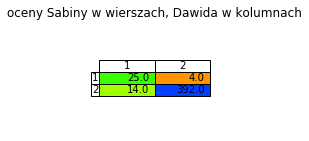

[[ 210.  159.   18.    1.    2.]
 [   9.    5.    3.    0.    1.]
 [   2.    0.    0.    8.    1.]
 [   0.    0.    0.    5.    5.]
 [   0.    0.    0.    0.    6.]]
0.0 5.35185813348


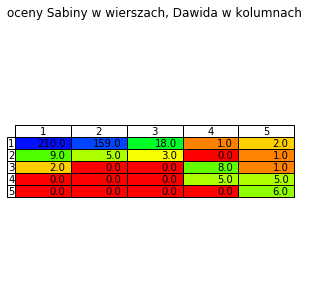

In [4]:
# trochę kod! mądrze kopiować do pycharma!
# kolorowanie tabelek
import matplotlib as mpl

def colourful_table(data, row_labels, col_labels, title):
    # normalizator do kolorowania
    data_to_color = np.log(data+1)
    print data_to_color.min(), data_to_color.max()
    normal = mpl.colors.Normalize(0.5*data_to_color.min(), 1.5*data_to_color.max())

    fig = plt.figure(figsize=(data.shape[0], data.shape[1]))
    ax = fig.add_subplot(111, frameon=False, xticks=[], yticks=[])
    ax.set_title(title)
    the_table = plt.table(
                    cellText=data,
                    rowLabels=row_labels,
                    colLabels = col_labels,
                    loc='center', 
                    cellColours=plt.cm.hsv(normal(data_to_color))
                )
    plt.show()

def sabina_to_dawid(sabina, dawid):
    n = len(np.unique(sabina))
    differences = np.zeros((n, n))

    for r in xrange(sabina.shape[0]):
        for c in xrange(sabina.shape[1]):
            if r<c:
                differences[sabina[r, c], dawid[r, c]] += 1

    differences = differences[1:, 1:]
    print differences

    colourful_table(differences, xrange(1, n), xrange(1, n), 'oceny Sabiny w wierszach, Dawida w kolumnach')
    
sabina_to_dawid(sabina_bin, dawid_bin)
sabina_to_dawid(sabina_scale, dawid_scale)

In [5]:
from data_visualization_script import data_as_image, slownik_dopasowan, dopasowania

In [6]:
# data_as_image(sabina_bin, sabina_bin, 'Sabina binary')
# data_as_image(dawid_bin, dawid_bin, 'Dawid binary')
# data_as_image(sabina_scale, sabina_scale, 'Sabina scale')
# data_as_image(dawid_scale, dawid_scale, 'Dawid scale')

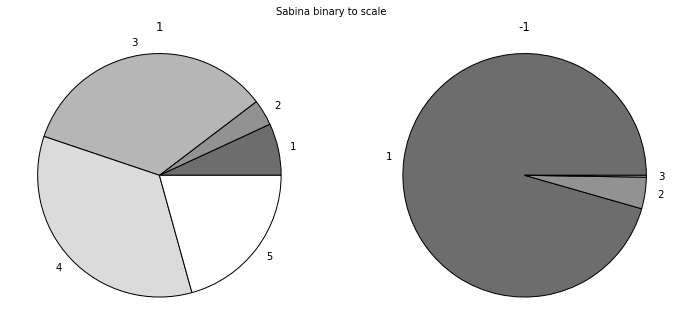

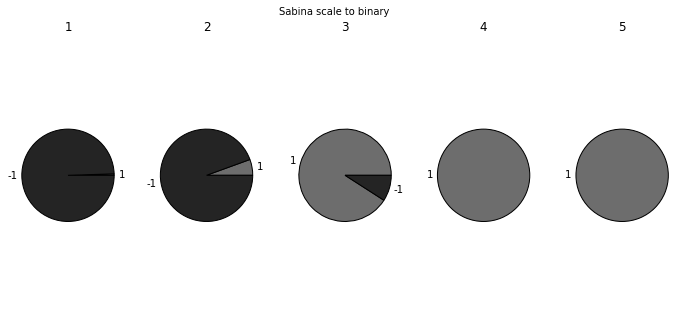

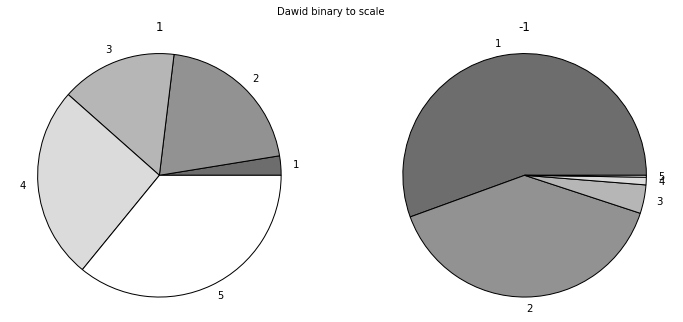

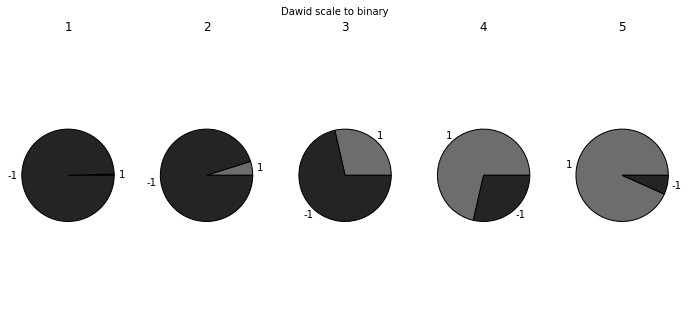

In [9]:
# TODO: testing!
bintoscale, scaletobin = slownik_dopasowan(sabina_bin, sabina_scale, None)
dopasowania(bintoscale, 'Sabina binary to scale')
dopasowania(scaletobin, 'Sabina scale to binary')

bintoscale, scaletobin = slownik_dopasowan(dawid_bin, dawid_scale, None)
dopasowania(bintoscale, 'Dawid binary to scale')
dopasowania(scaletobin, 'Dawid scale to binary')

In [8]:
print slownik_dopasowan(sabina_bin, sabina_scale, None)

({1: Counter({3: 20, 4: 20, 5: 12, 1: 4, 2: 2}), -1: Counter({1: 776, 2: 34, 3: 2})}, {1: Counter({-1: 776, 1: 4}), 2: Counter({-1: 34, 1: 2}), 3: Counter({1: 20, -1: 2}), 4: Counter({1: 20}), 5: Counter({1: 12})})
